# Profile Data Analysis

The purpose of this workbook is to analyse the data scraped from MP's twitter profiles. Some questions ask?

* Who is the most popular mp on twitter?
* Who tweets the most?
* Who registered first?
* Who has the most followers?
* Which parties have the most/least followers?

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

## Profile Data Analysis

The file profile_data.csv contains data scraped from MP's twitter profiles as well as some data from the 2017 election e.g. number of votes.

Note that numbers such as tweet_count may not match up with the csv containing the actual tweets. This is because of:

1. Slight time difference in time collection. Tweets were collected a day or so after the profile data.
2. Some metrics such as tweet count include retweets which were not collected.
3. Not all tweets could be collected due to errors in the search API.


In [94]:
profile_df = pd.read_csv('profile_data.csv', index_col=False)

In [95]:
profile_df.head()

,user_name,name,constituency,party,gender,follower_count,following_count,joined,bio,tweet_count,like_count,photo_count,location,sitting_mp,former_mp,votes,share,change
0,skinnock,Stephen Kinnock,Aberavon,Labour,Male,17001,1348.0,2012-07-28 08:11:00,Labour Member of Parliament for Aberavon | Mem...,5438,1907.0,753.0,Port Talbot,True,True,22662,0.681195,0.192155
1,gutoaberconwy,Guto Bebb,Aberconwy,Conservative,Male,709,38.0,2016-07-12 04:02:00,Office of the Conservative Member of Parliamen...,623,72.0,35.0,NaN,True,True,14337,0.445941,0.030888
2,kirstysnp,Kirsty Blackman,Aberdeen North,Scottish National Party,Female,10600,1851.0,2014-06-16 21:41:00,SNP MP for Aberdeen North. Depute leader of SN...,10586,8549.0,879.0,NaN,True,True,15170,0.412711,-0.151588
3,rossthomson_mp,Ross Thomson,Aberdeen South,Conservative,Male,5091,940.0,2012-03-29 03:04:00,Scottish Conservative Member of Parliament for...,11750,2378.0,953.0,Aberdeen,False,False,18746,0.421325,0.192967
4,neilgraymp,Neil Gray,Airdrie and Shotts,Scottish National Party,Male,7542,1696.0,2011-04-24 07:56:00,"Father, husband @mrskrgray and SNP MP for Aird...",12773,2836.0,271.0,NaN,True,True,14291,0.376059,-0.163321


In [96]:
profile_df.describe()

,follower_count,following_count,tweet_count,like_count,photo_count,votes,share,change
count,5.400000e+02,539.000000,540.000000,524.000000,539.000000,540.000000,540.000000,540.000000
mean,2.486325e+04,1825.482375,8807.033333,2732.664122,613.213358,27520.722222,0.555897,0.069887
std,8.715608e+04,2852.952160,11178.207743,5397.185920,616.621272,6579.443098,0.096488,0.077164
min,1.170000e+02,3.000000,2.000000,3.000000,0.000000,11061.000000,0.292278,-0.187868
25%,5.378750e+03,546.500000,2158.500000,133.000000,202.000000,22979.750000,0.493711,0.038472
50%,1.054300e+04,1071.000000,4793.500000,751.000000,426.000000,27017.500000,0.555416,0.080416
75%,1.801800e+04,2097.000000,11354.500000,2715.500000,837.500000,32253.750000,0.613643,0.118013
max,1.664528e+06,45238.000000,83574.000000,45140.000000,4575.000000,47213.000000,0.857288,0.302728


## MP Rankings

Which MPs have the most followers, tweets, likes etc?

In [97]:
# Most followers

profile_df.sort_values('follower_count', ascending=False).head()

,user_name,name,constituency,party,gender,follower_count,following_count,joined,bio,tweet_count,like_count,photo_count,location,sitting_mp,former_mp,votes,share,change
248,jeremycorbyn,Jeremy Corbyn,Islington North,Labour,Male,1664528,2431.0,2010-02-26 07:45:00,Leader of the Labour Party.,9137,140.0,2682.0,UK,True,True,40086,0.729792,0.127383
138,ed_miliband,Edward Miliband,Doncaster North,Labour,Male,738153,1532.0,2009-07-31 07:23:00,Labour MP for Doncaster North. Husband to Just...,5663,29.0,467.0,www.labour.org.uk,True,True,25711,0.607653,0.083413
290,theresa_may,Theresa May,Maidenhead,Conservative,Female,447397,3.0,2016-06-28 08:01:00,Prime Minister and @Conservatives Leader.,514,21.0,202.0,NaN,True,True,37718,0.647642,-0.010663
483,borisjohnson,Boris Johnson,Uxbridge and South Ruislip,Conservative,Male,392786,118.0,2015-04-01 13:15:00,Secretary of State for Foreign & Commonwealth ...,1120,4.0,426.0,London,True,True,23716,0.507903,0.005548
512,timfarron,Tim Farron,Westmorland and Lonsdale,Liberal Democrat,Male,291592,12910.0,2009-10-05 06:22:00,MP for Westmorland and Lonsdale & Former Leade...,71317,10004.0,394.0,Kendal,True,True,23686,0.458258,-0.056651


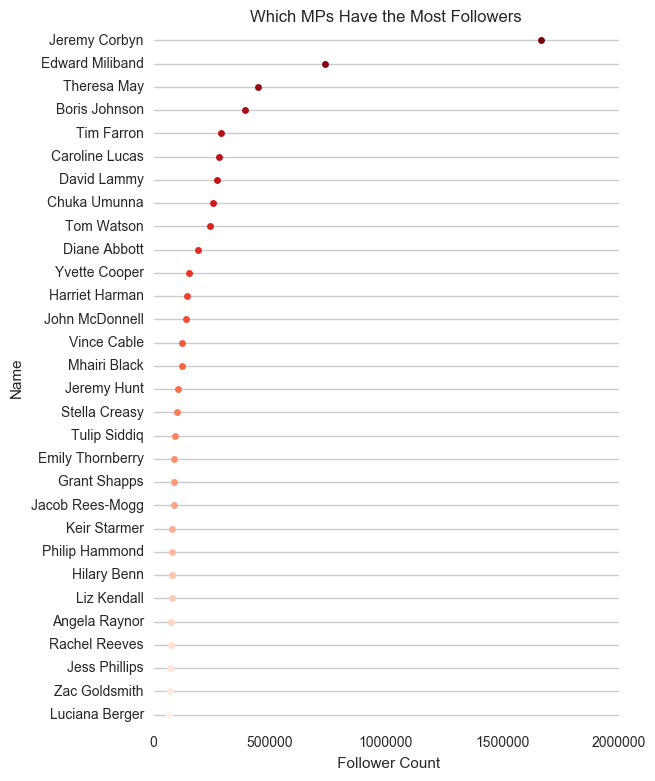

In [98]:
# Visualise

fig, ax = plt.subplots(figsize=(6,9))

sns.set(style="whitegrid")
temp =profile_df.sort_values('follower_count', ascending=False).head(30)

sns.stripplot(x='follower_count', y='name', data=temp,size=5, orient="h",palette="Reds_r", edgecolor="gray")

sns.despine(left=True, bottom=True)

ax.xaxis.grid(False)
ax.yaxis.grid(True)
ax.set(xlim=(0, 2000000), xlabel=" Follower Count", ylabel="Name")
plt.title('Which MPs Have the Most Followers')


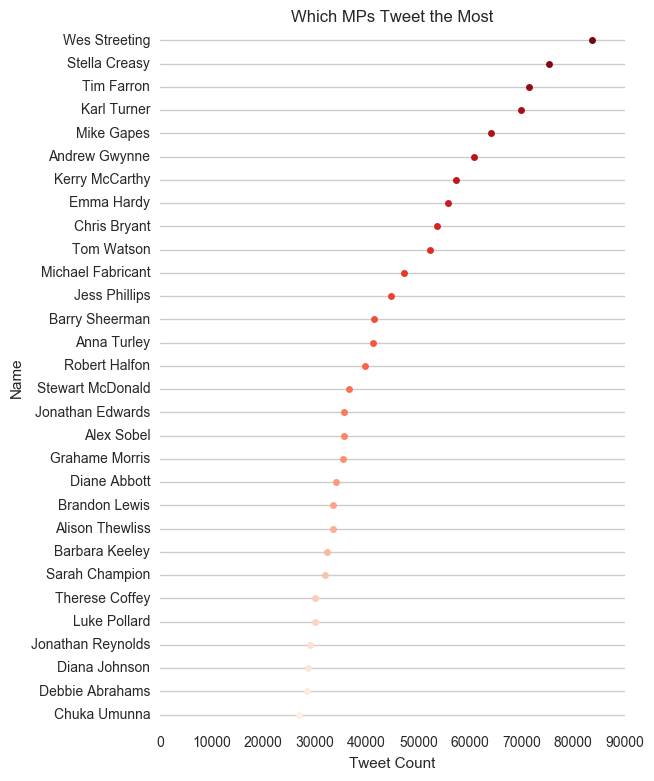

In [103]:
# Repeat for tweet count

fig, ax = plt.subplots(figsize=(6,9))

sns.set(style="whitegrid")
temp =profile_df.sort_values('tweet_count', ascending=False).head(30)

sns.stripplot(x='tweet_count', y='name', data=temp,size=5, orient="h",palette="Reds_r", edgecolor="gray")

sns.despine(left=True, bottom=True)

ax.xaxis.grid(False)
ax.yaxis.grid(True)
ax.set(xlim=(0,90000),xlabel="Tweet Count", ylabel="Name")
plt.title('Which MPs Tweet the Most')

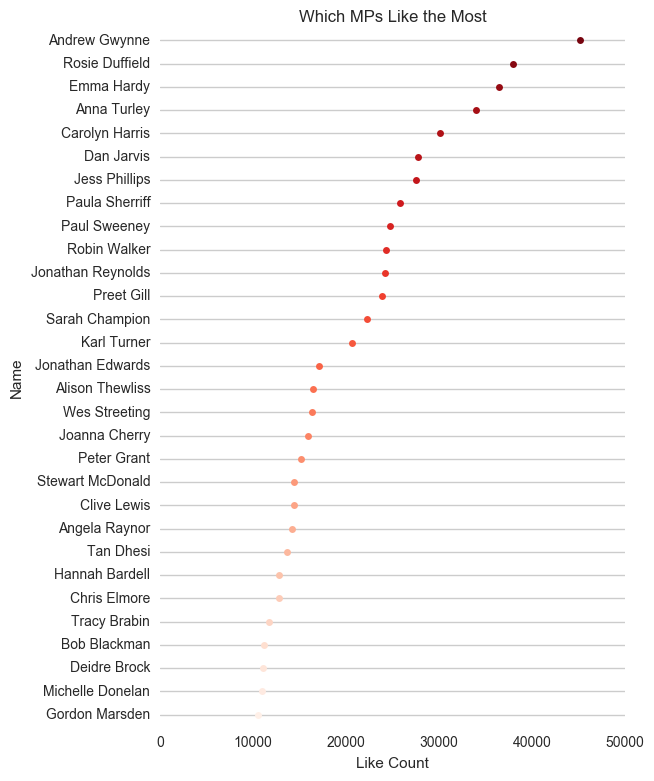

In [104]:
# Repeat for like count

fig, ax = plt.subplots(figsize=(6,9))

sns.set(style="whitegrid")
temp =profile_df.sort_values('like_count', ascending=False).head(30)

sns.stripplot(x='like_count', y='name', data=temp,size=5, orient="h",palette="Reds_r", edgecolor="gray")

sns.despine(left=True, bottom=True)

ax.xaxis.grid(False)
ax.yaxis.grid(True)
ax.set(xlim=(0,50000),xlabel="Like Count", ylabel="Name")
plt.title('Which MPs Like the Most')